# Homework 4 Spring 2022

Due 04/18 23:59 

### Your name: Chaewon Park

### Your UNI: cp3227

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pprint 
pp = pprint.PrettyPrinter(indent=4)


# Part 1: Feed forward network from scratch!

For this part, you are not allowed to use any library other than numpy. 

In this part, you will will implement the forward pass and backward pass (i.e. the derivates of each parameter wrt to the loss) for the following neural network:

<img src="images/nn.png" width=400 height=400/>

The weight matrix for the hidden layer is W1 and has bias b1. 

The weight matrix for the ouput layer is W2 and has bias b2.

Activatation function is **sigmoid** for both hidden and output layer

Loss function is the MSE loss $$L(y,y_t) = \frac{1}{2N}\sum_{n=1}^{N}(y^n - y_{t}^{n})^2$$

Refer to the below dictionary for dimensions for each matrix

In [2]:
np.random.seed(0) # don't change this

weights = {
    'W1': np.random.randn(3, 2),
    'b1': np.zeros(3),
    'W2': np.random.randn(3),
    'b2': 0,
}
X = np.random.rand(1000,2)
Y = np.random.randint(low=0, high=2, size=(1000,))

In [3]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [4]:
#Implement the forward pass
def forward_propagation(X, weights):
    # Z1 -> output of the hidden layer before applying activation
    # H -> output of the  hidden layer after applying activation
    # Z2 -> output of the final layer before applying activation
    # Y -> output of the final layer after applying activation
    
    Z1 = np.dot(X, weights['W1'].T)  + weights['b1']
    H = sigmoid(Z1)
    
    Z2 = np.dot(H, weights['W2'].T)  + weights['b2']
    Y = sigmoid(Z2)

    return Y, Z2, H, Z1

In [5]:
# Implement the backward pass
# Y_T are the ground truth labels
def back_propagation(X, Y_T, weights):
    N_points = X.shape[0]

    # forward propagation
    Y, Z2, H, Z1 = forward_propagation(X, weights)
    L = (1/(2*N_points)) * np.sum(np.square(Y - Y_T))
    
    # back propagation
    dLdY = 1/N_points * (Y - Y_T)
    dLdZ2 = np.multiply(dLdY, (sigmoid(Z2)*(1-sigmoid(Z2))))
    dLdW2 = np.dot(H.T, dLdZ2)
    
    ## dLdb2 = dLdZ2 * dZ2db2
    ## scalar = (1,1000) @ (1000, 1)
    dLdb2 = dLdZ2.T @ np.ones((N_points))
    
    ## dLdH = dLdZ2 * dZ2dH
    ## (1000, 3) = (1000,1) @ (1, 3)
    dLdH = dLdZ2.reshape(N_points, 1) @ np.expand_dims(weights['W2'], axis=0)
    
    ## dLdZ1 = dLdH * dHdZ1
    dLdZ1 = dLdH * sigmoid(Z1) * (1-sigmoid(Z1))
    
    ## dLdW1 = dLdZ1 * dZ1dW1
    ## (3,2) = (3, 1000) @ (1000, 2)
    dLdW1 = dLdZ1.T @ X
    
    ## dLdb1 = dLdZ1 * dZ1db1
    ## (3,) = (3,1000) @ (1000, 1)
    dLdb1 = dLdZ1.T @ np.ones(N_points)
    
    gradients = {
        'W1': dLdW1,
        'b1': dLdb1,
        'W2': dLdW2,
        'b2': dLdb2,
    }
    
    return gradients, L

In [6]:
gradients, L = back_propagation(X, Y, weights)
print(L)

0.1332476222330792


In [7]:
pp.pprint(gradients)

{   'W1': array([[ 0.00244596,  0.00262019],
       [-0.00030765, -0.00024188],
       [-0.00034768, -0.000372  ]]),
    'W2': array([0.02216011, 0.02433097, 0.01797174]),
    'b1': array([ 0.00492577, -0.00058023, -0.00065977]),
    'b2': 0.029249230265318688}


Your answers should be close to L = 0.133 and 
'b1': array([ 0.00492, -0.000581, -0.00066]). You will be graded based on your implementation and outputs for L, W1, W2 b1, and b2

You can use any library for the following questions.

# Part 2: Fashion MNIST dataset
The Fashion-MNIST dataset is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. It's commonly used as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning models. You can read more about the dataset at the [Fashion-MNIST homepage](https://github.com/zalandoresearch/fashion-mnist). 

We will utilize tensorflow to import the dataset, however, feel free to use any framework (TF/PyTorch) to answer the assignment questions.

In [8]:
from tensorflow.keras.datasets import fashion_mnist

# load data
(xdev, ydev), (xtest, ytest) = fashion_mnist.load_data()

### 2.1 Plot the first 25 samples from both development and test sets on two separate 5$\times $5 subplots. 

Each image in your subplot should be labelled with the ground truth label. Get rid of the plot axes for a nicer presentation. You should also label your plots to indicate if the plotted data is from development or test set. You are given the expected output for development samples.

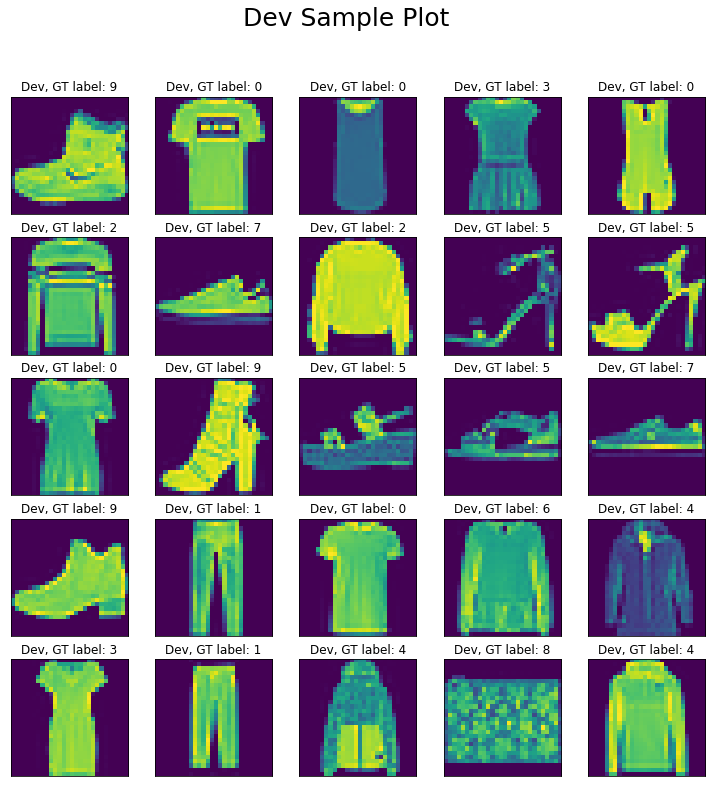

In [9]:
# specify the number of rows and columns you want to see
num_row = 5
num_col = 5

# get a segment of the dataset
num = num_row*num_col
images = xdev[:num]
labels = ydev[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(2.5*num_col, 2.5*num_row))

    
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i])
    ax.set_title("Dev, GT label: "+  str(labels[i]))
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    
fig.suptitle('Dev Sample Plot', fontsize=25)

plt.show()

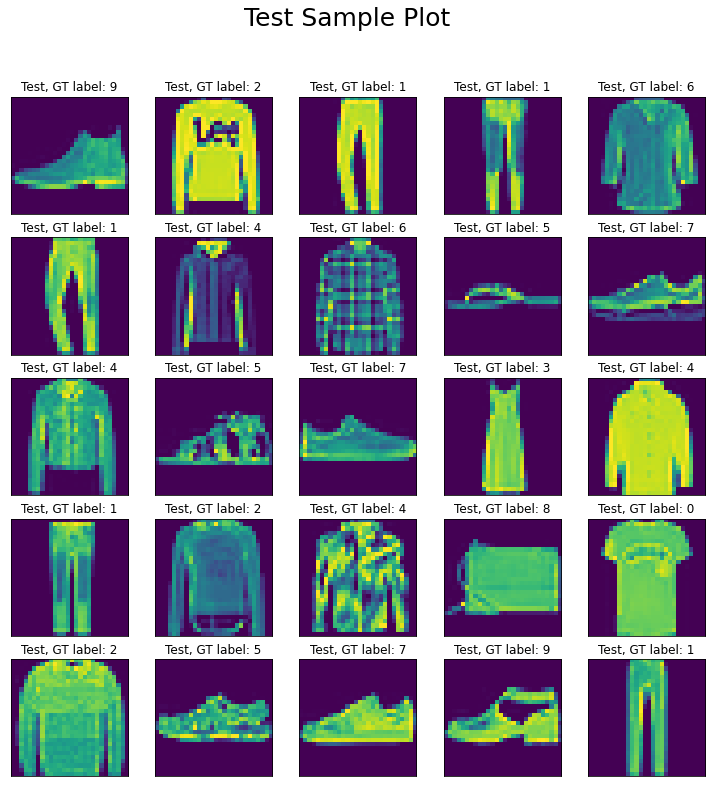

In [10]:
# Plot test samples

# specify the number of rows and columns you want to see
num_row = 5
num_col = 5

# get a segment of the dataset
num = num_row*num_col
images = xtest[:num]
labels = ytest[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(2.5*num_col, 2.5*num_row))

for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i])
    ax.set_title("Test, GT label: "+  str(labels[i]))
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
fig.suptitle('Test Sample Plot', fontsize=25)
plt.show()

# Part 3: Feed Forward Network

In this part of the homework, we will build and train a deep neural network on the Fashion-MNIST dataset.

### 3.1.1 Print their shapes - $x_\text{dev}, y_{\text{dev}}, x_\text{test}, y_\text{test}$

In [11]:
# Print
print("xdev shape:", xdev.shape)
print("ydev shape:",ydev.shape)
print("xtest shape:",xtest.shape)
print("ytest shape:",ytest.shape)

xdev shape: (60000, 28, 28)
ydev shape: (60000,)
xtest shape: (10000, 28, 28)
ytest shape: (10000,)


### 3.1.2 Flatten the images into one-dimensional vectors. Again, print out the shapes of $x_\text{dev}, x_\text{test}$

In [12]:
# Flatten and print
xdev_batch_size = xdev.shape[0]
xdev_flat = xdev.reshape(xdev_batch_size, -1)

xtest_batch_size = xtest.shape[0]
xtest_flat = xtest.reshape(xtest_batch_size, -1)
print("xdev shape:", xdev_flat.shape)
print("xtest shape:", xtest_flat.shape)

xdev shape: (60000, 784)
xtest shape: (10000, 784)


### 3.1.3 Standardize the development and test sets. 

Note that the images are 28x28 numpy arrays, and each pixel takes value from 0 to 255.0. 0 means background (white), 255 means foreground (black).

In [13]:
# Standardize
xdev_flat_st = xdev_flat/255.0
xtest_st = xtest_flat/255.0

### 3.1.4 Assume your neural network has softmax activation as the last layer activation. Would you consider encoding your target variable? Which encoding would you choose and why? The answer depends on your choice of loss function too, you might want to read 2.2.1 and 2.2.5 before answering this one!

Encode the target variable else provide justification for not doing so. Supporting answer may contain your choice of loss function.


**Answer**: First of all, we don't need to do encoding if we use PyTorch because when we use the Dataset & Dataloader function, it automatically maps the classes as the labels. Furthermore, the purpose of encoding is to map 'categorical data' into 'numerical data'. However, since we use softmax activation, the output of the last layer is going to be the numerical probability of each class. Hence, we don't need to apply additional encoding as we will use the target label to index into the output probability vector to calculate the loss. 

That is, since this is a multi-classification problem, it is most reasonable to use CrossEntropyLoss function. The CrossEntropyLoss function takes in two parameters as follows: input of size (N,C) where N is size of batch and C is number of classes, and target of size (N) where N is size of batch and each element is an integer value between 0~ (C-1). Such parameters don't require additional encoding.

### 3.1.5 Train-test split your development set into train and validation sets (8:2 ratio). 

Note that splitting after encoding does not causes data leakage here because we know all the classes beforehand.

In [14]:
# split
from sklearn.model_selection import train_test_split

xtrain_st, xval_st, ytrain, yval = train_test_split(xdev_flat_st, ydev, test_size=0.2, random_state= 418)

### 3.2.1 Build the feed forward network

Using Softmax activation for the last layer and ReLU activation for every other layer, build the following model:

1. First hidden layer size - 128
2. Second hidden layer size - 64
3. Third and last layer size - You should know this



In [15]:
# build model
import cv2
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchvision.models as models
import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import random_split

import math
import os
import argparse


class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim=28*28):
        super(FeedforwardNeuralNetModel, self).__init__()
        
        # Linear function
        self.fc1 = nn.Linear(input_dim, 128) 
        self.fc2 = nn.Linear(128, 64)  
        self.fc3 = nn.Linear(64, 10)
        
        # Non-linearity
        self.relu = nn.ReLU()
        # I removed softmax layer because there is already softmax incorporated in the PyTorch CrossEntropyLoss function
        # TA confirmed that if softmax is already incorporated in the loss function, I should remove softmax layer
        # since we don't want to apply softmax redundantly

    def forward(self, x):
        # Linear function  # LINEAR
        x = self.fc1(x)
        x = self.relu(x)
        
        x = self.fc2(x)
        x = self.relu(x)
        
        out = self.fc3(x)

        return out

### 3.2.2 Print out the model summary

In [40]:
#!pip install torchsummary

In [16]:
# print summary
from torchvision import models
from torchsummary import summary

first_input = torch.from_numpy(xtrain_st[0, :]).double()
print(first_input.size())

model = FeedforwardNeuralNetModel()
print(model)

summary(model, input_size=(1, 28*28))

torch.Size([784])
FeedforwardNeuralNetModel(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 128]         100,480
              ReLU-2               [-1, 1, 128]               0
            Linear-3                [-1, 1, 64]           8,256
              ReLU-4                [-1, 1, 64]               0
            Linear-5                [-1, 1, 10]             650
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.42
Estimated Total Size (MB): 0.42
----------------------------------------------------

### 3.2.3 Report the total number of trainable parameters. Do you think this number is dependent on the image height and width? Only Yes/No required. 

**Answer**: Trainable params: 109,386. Yes it is dependent on the image height and width.

### 3.2.4 Print out your model's output on first train sample. This will confirm if your dimensions are correctly set up. Is the sum of this output equal to 1 upto two decimal places?

In [20]:
# answer
model = model.double()
first_input = torch.from_numpy(xtrain_st[0, :]).double()
outputs = model(first_input)

## this output didn't have softmax applied
## because i removed softmax layer from the model because Pytorch's CrossEntropyLoss already has softmax included.
print("Raw output on First Train Sample:",outputs.data)


## hence, here i will manually apply softmax to show that the sum of the softmax applied output equals to one
softmax_func = nn.Softmax()
softmaxed_output = softmax_func(outputs.data)

print("Softmax applied output:", softmaxed_output)

## Comment: Yes, the sum of the output equals to one.
print("Sum of output:", sum(softmaxed_output))

Raw output on First Train Sample: tensor([-0.0138, -0.1014,  0.0719,  0.1079,  0.0757,  0.0741,  0.0844, -0.0522,
        -0.0266,  0.0091], dtype=torch.float64)
Softmax applied output: tensor([0.0962, 0.0881, 0.1048, 0.1086, 0.1052, 0.1050, 0.1061, 0.0926, 0.0950,
        0.0984], dtype=torch.float64)
Sum of output: tensor(1., dtype=torch.float64)


C:\Users\cwp94\AppData\Local\Temp/ipykernel_45576/1294225972.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmaxed_output = softmax_func(outputs.data)


### 3.2.5 Considering the output of your model and overall objective, what loss function would you choose and why? Choose a metric for evaluation and explain the reason behind your choice.

**Answer**: Since the output of the model is a prediction probability for each of the 10 classes, we should use CrossEntropyLoss for this multi-classification problem. Also, since we want to get as many images correctly classified as possible and as the class distribution is equal and unbiased, I'd choose accuracy as the metric for evaluation. 

### 3.2.6 Using the metric and loss function above, with Adam as the optimizer, train your model for 20 epochs with batch size 128. 

Make sure to save and print out the values of loss function and metric after each epoch for both train and validation sets.

Note - Use appropriate learning rate for the optimizer, you might have to try different values

In [21]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, imgs, labels):
        self.data = []
        for i in range(len(imgs)):
            img = imgs[i]
            label = labels[i]
            self.data.append([img, label])
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        img, label = self.data[idx]
        img_tensor = torch.from_numpy(img)
        class_id = torch.tensor([label])
        return img_tensor, class_id

In [22]:
batch_size = 128

train_dataset = CustomDataset(xtrain_st, ytrain)
val_dataset = CustomDataset(xval_st, yval)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [23]:
import errno
import os
import sys
import time
import math


class AverageMeter(object):
    """Computes and stores the average and current value
       Imported from https://github.com/pytorch/examples/blob/master/imagenet/main.py#L247-L262
    """
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
        

def accuracy(output, target, topk=(1,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)

    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].reshape(-1).float().sum(0)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res

In [24]:
# hyper-parmas
num_epochs = 20
criterion = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train_acc_list= []
train_loss_list = []
val_acc_list= []
val_loss_list = []

for epoch in range(num_epochs):
    ### train
    
    # log train acc
    train_accuracies = AverageMeter()
    train_losses = AverageMeter()
    
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.requires_grad_()

        # Forward pass to get output/logits
        outputs = model(images)

        ### Calculate Loss and Acc: softmax --> cross entropy loss
        labels = labels.reshape(-1)
        loss = criterion(outputs, labels)
        acc1, _ = accuracy(outputs.data, labels, topk=(1, 2))
    
        # update avg meter for loss and acc
        train_losses.update(loss.data.item(), images.size(0))
        train_accuracies.update(acc1.item(), images.size(0))
        

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()
        

    train_acc_list.append(train_accuracies.avg)
    train_loss_list.append(train_losses.avg)
        
    # Print Avg Train Loss & Train Acc/epoch
    print('Epoch: {}'.format(epoch))
    print('Train_Loss: {:.3f}. Train_Accuracy: {:.3f}'.format(train_losses.avg, train_accuracies.avg))

    
    ### val
    
    # log val acc
    val_accuracies = AverageMeter()
    val_losses = AverageMeter() 
    
    model.eval()
    with torch.no_grad():
        
        # Iterate through val dataset
        for images, labels in val_loader:
            # Load images with gradient accumulation capabilities
            images = images.requires_grad_()

            # Forward pass only to get logits/output
            outputs = model(images)

            ### Calculate Loss and Acc: softmax --> cross entropy loss
            labels = labels.reshape(-1)
            loss = criterion(outputs, labels)
            acc1, _ = accuracy(outputs.data, labels, topk=(1, 2))

            # update avg meter for loss and acc
            val_losses.update(loss.data.item(), images.size(0))
            val_accuracies.update(acc1.item(), images.size(0))
        

    val_acc_list.append(val_accuracies.avg)
    val_loss_list.append(val_losses.avg)
        
    # Print Avg Train Loss & Train Acc/epoch
    print('Val_Loss: {:.3f}. Val_Accuracy: {:.3f}'.format(val_losses.avg, val_accuracies.avg))
    print()

Epoch: 0
Train_Loss: 0.661. Train_Accuracy: 77.154
Val_Loss: 0.484. Val_Accuracy: 82.908

Epoch: 1
Train_Loss: 0.436. Train_Accuracy: 84.696
Val_Loss: 0.432. Val_Accuracy: 84.933

Epoch: 2
Train_Loss: 0.388. Train_Accuracy: 86.135
Val_Loss: 0.381. Val_Accuracy: 86.283

Epoch: 3
Train_Loss: 0.361. Train_Accuracy: 87.033
Val_Loss: 0.366. Val_Accuracy: 86.225

Epoch: 4
Train_Loss: 0.337. Train_Accuracy: 87.898
Val_Loss: 0.388. Val_Accuracy: 85.783

Epoch: 5
Train_Loss: 0.322. Train_Accuracy: 88.498
Val_Loss: 0.351. Val_Accuracy: 87.008

Epoch: 6
Train_Loss: 0.304. Train_Accuracy: 89.033
Val_Loss: 0.340. Val_Accuracy: 87.492

Epoch: 7
Train_Loss: 0.296. Train_Accuracy: 89.250
Val_Loss: 0.339. Val_Accuracy: 87.608

Epoch: 8
Train_Loss: 0.282. Train_Accuracy: 89.658
Val_Loss: 0.328. Val_Accuracy: 88.217

Epoch: 9
Train_Loss: 0.272. Train_Accuracy: 90.108
Val_Loss: 0.318. Val_Accuracy: 88.525

Epoch: 10
Train_Loss: 0.265. Train_Accuracy: 90.138
Val_Loss: 0.335. Val_Accuracy: 87.758

Epoch: 11

### 3.2.7 Plot two separate plots displaying train vs validation loss and train vs validation metric scores over each epoch

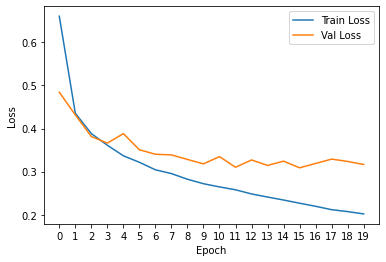

In [25]:
# plot train vs validation loss

plt.plot(range(20), train_loss_list, label = "Train Loss")
plt.plot(range(20), val_loss_list, label = "Val Loss")
plt.xticks(range(0,20))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

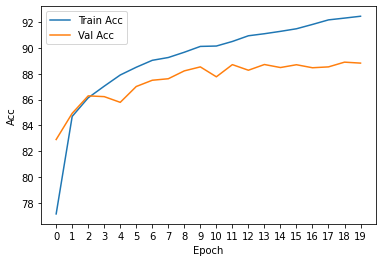

In [26]:
# plot train vs validation acc

plt.plot(range(20), train_acc_list, label = "Train Acc")
plt.plot(range(20), val_acc_list, label = "Val Acc")
plt.xticks(range(0,20))
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend()
plt.show()

### 3.3.1 Report metric score on test set

In [27]:
# evaluate

test_dataset = CustomDataset(xtest_st, ytest)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

### test
test_acc_list= []
test_loss_list = []

# log test acc
test_accuracies = AverageMeter()
test_losses = AverageMeter() 

# save GT and pred labels
ypred = []
ytrue = []
    
model.eval()
with torch.no_grad():
        
    # Iterate through val dataset
    for images, labels in test_loader:
        # Load images with gradient accumulation capabilities
        images = images.requires_grad_()
        
        # Forward pass only to get logits/output
        outputs = model(images)

        ### Calculate Loss and Acc: softmax --> cross entropy loss
        labels = labels.reshape(-1)
        loss = criterion(outputs, labels)
        acc1, _ = accuracy(outputs.data, labels, topk=(1, 2))

        # update avg meter for loss and acc
        test_losses.update(loss.data.item(), images.size(0))
        test_accuracies.update(acc1.item(), images.size(0))
        
        # save GT and pred labels
        outputs = (torch.max(torch.exp(outputs), 1)[1]).data.cpu().numpy()
        ypred.extend(outputs) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        ytrue.extend(labels) # Save Truth
        

test_acc_list.append(test_accuracies.avg)
test_loss_list.append(test_losses.avg)
        
# Print Avg Train Loss & Train Acc/epoch
print('Test_Loss: {:.3f}. Test_Accuracy: {:.3f}'.format(test_losses.avg, test_accuracies.avg))
print()

Test_Loss: 0.350. Test_Accuracy: 88.100



### 3.3.2 Plot confusion matrix on the test set and label the axes appropriately with true and predicted labels. 

Labels on the axes should be the original classes (0-9) and not one-hot-encoded. To achieve this, you might have to reverse transform your model's predictions. Please look into the documentation of your target encoder. Sample output is provided

<AxesSubplot:>

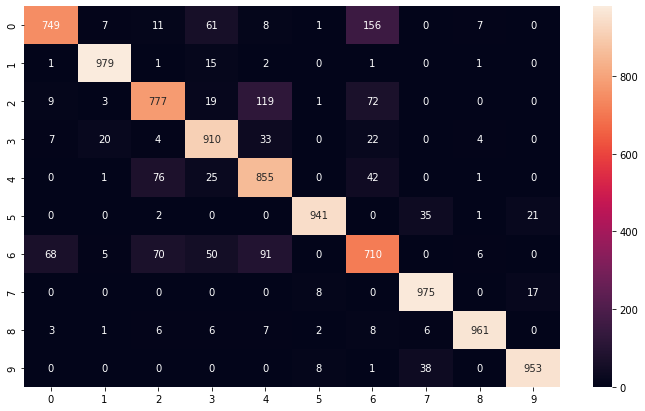

In [28]:
# confusion matrix
# constant for classes
classes = (range(0,10))

from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd


# Build confusion matrix
cf_matrix = confusion_matrix(ytrue, ypred)
df_cm = pd.DataFrame(cf_matrix, index = [i for i in classes],
                     columns = [i for i in classes])

plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True, fmt='g')

### 3.3.3 Plot the first 25 samples of test dataset on a 5$\times $5 subplot and this time label the images with both the ground truth (GT) and predicted class (P). 

For instance, an image of class 3, with predicted class 7 should have the label GT:3, P:7. Get rid of the plot axes for a nicer presentation.

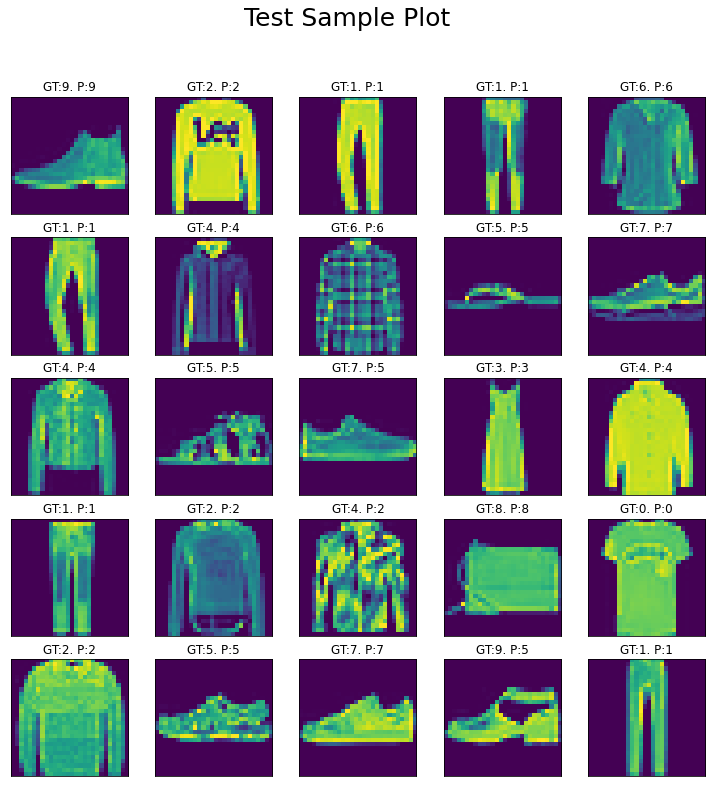

In [29]:
# Plot test samples

# specify the number of rows and columns you want to see
num_row = 5
num_col = 5

# get a segment of the dataset
num = num_row*num_col
images = xtest[:num]
labels = ytest[:num]
preds = ypred[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(2.5*num_col, 2.5*num_row))

for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i])
    ax.set_title('GT:{}. P:{}'.format(labels[i], preds[i]))
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
fig.suptitle('Test Sample Plot', fontsize=25)
plt.show()

# Part 4: Convolutional Neural Network

In this part of the homework, we will build and train a classical convolutional neural network, LeNet-5, on the Fashion-MNIST dataset. 

In [30]:
from tensorflow.keras.datasets import fashion_mnist

# load data again
(xdev, ydev), (xtest, ytest) = fashion_mnist.load_data()

### 4.1 Preprocess

1. Standardize the datasets

2. Encode the target variable.

3. Split development set to train and validation sets (8:2).

In [31]:
# TODO: Standardize the datasets
xdev_st = xdev/255.0
xtest_st = xtest/255.0

# TODO: Encode the target labels
## Don't need to do this part since we are using pytorch

# Split
# split
xtrain_st, xval_st, ytrain, yval = train_test_split(xdev_st, ydev, test_size=0.2, random_state= 418)

### 4.2.1 LeNet-5

We will be implementing the one of the first CNN models put forward by Yann LeCunn, which is commonly refered to as LeNet-5. The network has the following layers:

1. 2D convolutional layer with 6 filters, 5x5 kernel, stride of 1  padded to yield the same size as input, ReLU activation
2. Maxpooling layer of 2x2
3. 2D convolutional layer with 16 filters, 5x5 kernel, 0 padding, ReLU activation 
4. Maxpooling layer of 2x2 
5. 2D convolutional layer with 120 filters, 5x5 kernel, ReLU activation. Note that this layer has 120 output channels (filters), and each channel has only 1 number. The output of this layer is just a vector with 120 units!
6. A fully connected layer with 84 units, ReLU activation
7. The output layer where each unit respresents the probability of image being in that category. What activation function should you use in this layer? (You should know this)

In [32]:
# TODO: build the model

# build model
import cv2
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchvision.models as models
import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import random_split

import math
import os
import argparse

class BasicNet(nn.Module):

    def __init__(self):
        super().__init__()

        self.conv_model = nn.Sequential(
                      #1
                      nn.Conv2d(1, 6, kernel_size=5, stride=1, padding= 2, bias=True),
                      nn.ReLU(inplace=True),
                      nn.MaxPool2d(2, stride=2),
            
                      #2
                      nn.Conv2d(6, 16, kernel_size=5, stride= 1, padding =0, bias=True),
                      nn.ReLU(inplace=True),
                      nn.MaxPool2d(2, stride=2),
                      
                      #3
                      nn.Conv2d(16, 120, kernel_size=5, stride= 1, padding =0, bias=True),
                      nn.ReLU(inplace=True),
            

            )
        
        self.fc = nn.Sequential(
                      #4 FC
                      nn.Linear(120, 84, bias=True),
                      nn.ReLU(inplace=True),
            
                      # FC
                      nn.Linear(84, 10, bias=True)
            
                      # removing softmax because CrossEntropyLoss already has softmax incorporated
                      # we do not want to apply softmax redundantly
            )
        

        
        
    def forward(self, x):

        #call the conv layers
        x = self.conv_model(x)
        x = x.reshape(x.size(0), -1)
        x = self.fc(x)
        
        return x

### 4.2.2 Report layer output

Report the output dimensions of each layers of LeNet-5. **Hint:** You can report them using the model summary function that most frameworks have, or you can calculate and report the output dimensions by hand (It's actually not that hard and it's a good practice too!)

In [33]:
# TODO: report model output dimensions
# print summary
from torchvision import models
from torchsummary import summary

model = BasicNet()
print(model)

summary(model, (1, 28, 28))

BasicNet(
  (conv_model): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
    (7): ReLU(inplace=True)
  )
  (fc): Sequential(
    (0): Linear(in_features=120, out_features=84, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=84, out_features=10, bias=True)
  )
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
              ReLU-2            [-1, 6, 28, 28]               0
         MaxPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-

### 4.2.3 Model training

Train the model for 10 epochs. In each epoch, record the loss and metric (chosen in part 3) scores for both train and validation sets. Use two separate plots to display train vs validation metric scores and train vs validation loss. Finally, report the model performance on the test set. Feel free to tune the hyperparameters such as batch size and optimizers to achieve better performance.

In [34]:
model = model.double()

batch_size = 128

train_dataset = CustomDataset(xtrain_st, ytrain)
val_dataset = CustomDataset(xval_st, yval)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [35]:
# TODO: Train the model
# hyper-parmas
num_epochs = 10
criterion = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train_acc_list= []
train_loss_list = []
val_acc_list= []
val_loss_list = []

for epoch in range(num_epochs):
    ### train
    
    # log train acc
    train_accuracies = AverageMeter()
    train_losses = AverageMeter()
    
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = torch.unsqueeze(images, 1)
        images = images.requires_grad_()

        # Forward pass to get output/logits
        outputs = model(images)

        ### Calculate Loss and Acc: softmax --> cross entropy loss
        labels = labels.reshape(-1)
        loss = criterion(outputs, labels)
        acc1, _ = accuracy(outputs.data, labels, topk=(1, 2))
    
        # update avg meter for loss and acc
        train_losses.update(loss.data.item(), images.size(0))
        train_accuracies.update(acc1.item(), images.size(0))
        

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()
        

    train_acc_list.append(train_accuracies.avg)
    train_loss_list.append(train_losses.avg)
        
    # Print Avg Train Loss & Train Acc/epoch
    print('Epoch: {}'.format(epoch))
    print('Train_Loss: {:.3f}. Train_Accuracy: {:.3f}'.format(train_losses.avg, train_accuracies.avg))

    
    ### val
    
    # log val acc
    val_accuracies = AverageMeter()
    val_losses = AverageMeter() 
    
    model.eval()
    with torch.no_grad():
        
        # Iterate through val dataset
        for images, labels in val_loader:
            # Load images with gradient accumulation capabilities
            images = torch.unsqueeze(images, 1)
            images = images.requires_grad_()

            # Forward pass only to get logits/output
            outputs = model(images)

            ### Calculate Loss and Acc: softmax --> cross entropy loss
            labels = labels.reshape(-1)
            loss = criterion(outputs, labels)
            acc1, _ = accuracy(outputs.data, labels, topk=(1, 2))

            # update avg meter for loss and acc
            val_losses.update(loss.data.item(), images.size(0))
            val_accuracies.update(acc1.item(), images.size(0))
        

    val_acc_list.append(val_accuracies.avg)
    val_loss_list.append(val_losses.avg)
        
    # Print Avg Train Loss & Train Acc/epoch
    print('Val_Loss: {:.3f}. Val_Accuracy: {:.3f}'.format(val_losses.avg, val_accuracies.avg))
    print()


Epoch: 0
Train_Loss: 0.810. Train_Accuracy: 70.056
Val_Loss: 0.565. Val_Accuracy: 78.908

Epoch: 1
Train_Loss: 0.508. Train_Accuracy: 81.319
Val_Loss: 0.468. Val_Accuracy: 83.058

Epoch: 2
Train_Loss: 0.432. Train_Accuracy: 84.352
Val_Loss: 0.398. Val_Accuracy: 85.567

Epoch: 3
Train_Loss: 0.390. Train_Accuracy: 85.981
Val_Loss: 0.370. Val_Accuracy: 86.450

Epoch: 4
Train_Loss: 0.357. Train_Accuracy: 87.017
Val_Loss: 0.360. Val_Accuracy: 86.742

Epoch: 5
Train_Loss: 0.339. Train_Accuracy: 87.760
Val_Loss: 0.348. Val_Accuracy: 86.950

Epoch: 6
Train_Loss: 0.320. Train_Accuracy: 88.394
Val_Loss: 0.320. Val_Accuracy: 88.158

Epoch: 7
Train_Loss: 0.303. Train_Accuracy: 88.977
Val_Loss: 0.310. Val_Accuracy: 88.850

Epoch: 8
Train_Loss: 0.291. Train_Accuracy: 89.250
Val_Loss: 0.310. Val_Accuracy: 88.233

Epoch: 9
Train_Loss: 0.278. Train_Accuracy: 89.823
Val_Loss: 0.291. Val_Accuracy: 89.408



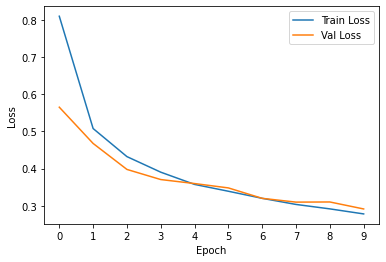

In [36]:
# TODO: Plot accuracy and loss over epochs
# plot train vs validation loss

plt.plot(range(10), train_loss_list, label = "Train Loss")
plt.plot(range(10), val_loss_list, label = "Val Loss")
plt.xticks(range(0,10))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

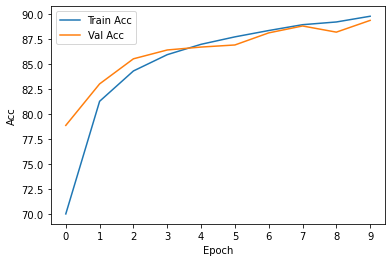

In [37]:
# plot train vs validation acc

plt.plot(range(10), train_acc_list, label = "Train Acc")
plt.plot(range(10), val_acc_list, label = "Val Acc")
plt.xticks(range(0,10))
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [38]:
# TODO: Report model performance on test set

# evaluate

test_dataset = CustomDataset(xtest_st, ytest)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

### test
test_acc_list= []
test_loss_list = []

# log test acc
test_accuracies = AverageMeter()
test_losses = AverageMeter() 

# save GT and pred labels
ypred = []
ytrue = []
    
model.eval()
with torch.no_grad():
        
    # Iterate through val dataset
    for images, labels in test_loader:
        # Load images with gradient accumulation capabilities
        images = torch.unsqueeze(images, 1)
        images = images.requires_grad_()
        
        # Forward pass only to get logits/output
        outputs = model(images)

        ### Calculate Loss and Acc: softmax --> cross entropy loss
        labels = labels.reshape(-1)
        loss = criterion(outputs, labels)
        acc1, _ = accuracy(outputs.data, labels, topk=(1, 2))

        # update avg meter for loss and acc
        test_losses.update(loss.data.item(), images.size(0))
        test_accuracies.update(acc1.item(), images.size(0))
        
        # save GT and pred labels
        outputs = (torch.max(torch.exp(outputs), 1)[1]).data.cpu().numpy()
        ypred.extend(outputs) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        ytrue.extend(labels) # Save Truth
        

test_acc_list.append(test_accuracies.avg)
test_loss_list.append(test_losses.avg)
        
# Print Avg Train Loss & Train Acc/epoch
print('Test_Loss: {:.3f}. Test_Accuracy: {:.3f}'.format(test_losses.avg, test_accuracies.avg))
print()

Test_Loss: 0.315. Test_Accuracy: 88.590



**What do you see from the plots? Are there signs of overfitting? If so, what are 
the signs and what techniques can we use to combat overfitting?**

**Answer:** The validation model performance is a bit unstable and also is much worse than training time in both loss and accuracy viewpoint. Yes there are signs of overfitting where as the epochs progress, the training loss keeps decreasing but the validation loss starts to slightly increase again. We can use drop-out and L1/L2 regularization to overcome overfitting. Another method could be collecting a more diverse dataset and adding it to our training or dropping some of the model features. Early stopping or ensembling could be another solution.

### 4.3 Overfitting

### 4.3.1 Drop-out

To overcome overfitting, we will train the network again with dropout this time. For hidden layers use dropout probability of 0.5. Train the model again for 15 epochs, use two plots to display train vs validation metric scores and train vs validation loss over each epoch. Report model performance on test set. What's your observation?

In [39]:
# TODO: build the model with drop-out layers

# TODO: build the model

# build model
import cv2
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchvision.models as models
import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import random_split

import math
import os
import argparse

class DropNet(nn.Module):

    def __init__(self):
        super().__init__()

        self.conv_model = nn.Sequential(
                      #1
                      nn.Conv2d(1, 6, kernel_size=5, stride=1, padding= 2, bias=True),
                      nn.ReLU(inplace=True),
                      nn.Dropout(0.5),
                      nn.MaxPool2d(2, stride=2),
            
                      #2
                      nn.Conv2d(6, 16, kernel_size=5, stride= 1, padding =0, bias=True),
                      nn.ReLU(inplace=True),
                      nn.Dropout(0.5),
                      nn.MaxPool2d(2, stride=2),
                      
                      #3
                      nn.Conv2d(16, 120, kernel_size=5, stride= 1, padding =0, bias=True),
                      nn.Dropout(0.5),
                      nn.ReLU(inplace=True)

            )
        
        self.fc = nn.Sequential(
                      #4 FC
                      nn.Linear(120, 84, bias=True),
                      nn.ReLU(inplace=True),
            
                      # FC
                      nn.Linear(84, 10, bias=True),
                      
                      # removing softmax because CrossEntropyLoss already has softmax incorporated
                      # we do not want to apply softmax redundantly
            )
        

        
        
    def forward(self, x):

        #call the conv layers
        x = self.conv_model(x)
        x = x.reshape(x.size(0), -1)
        x = self.fc(x)
        
        return x

In [40]:
# TODO: train the model

model = DropNet().double()

# hyper-parmas
num_epochs = 15
criterion = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train_acc_list= []
train_loss_list = []
val_acc_list= []
val_loss_list = []

for epoch in range(num_epochs):
    ### train
    
    # log train acc
    train_accuracies = AverageMeter()
    train_losses = AverageMeter()
    
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = torch.unsqueeze(images, 1)
        images = images.requires_grad_()

        # Forward pass to get output/logits
        outputs = model(images)

        ### Calculate Loss and Acc: softmax --> cross entropy loss
        labels = labels.reshape(-1)
        loss = criterion(outputs, labels)
        acc1, _ = accuracy(outputs.data, labels, topk=(1, 2))
    
        # update avg meter for loss and acc
        train_losses.update(loss.data.item(), images.size(0))
        train_accuracies.update(acc1.item(), images.size(0))
        

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()
        

    train_acc_list.append(train_accuracies.avg)
    train_loss_list.append(train_losses.avg)
        
    # Print Avg Train Loss & Train Acc/epoch
    print('Epoch: {}'.format(epoch))
    print('Train_Loss: {:.3f}. Train_Accuracy: {:.3f}'.format(train_losses.avg, train_accuracies.avg))

    
    ### val
    
    # log val acc
    val_accuracies = AverageMeter()
    val_losses = AverageMeter() 
    
    model.eval()
    with torch.no_grad():
        
        # Iterate through val dataset
        for images, labels in val_loader:
            # Load images with gradient accumulation capabilities
            images = torch.unsqueeze(images, 1)
            images = images.requires_grad_()

            # Forward pass only to get logits/output
            outputs = model(images)

            ### Calculate Loss and Acc: softmax --> cross entropy loss
            labels = labels.reshape(-1)
            loss = criterion(outputs, labels)
            acc1, _ = accuracy(outputs.data, labels, topk=(1, 2))

            # update avg meter for loss and acc
            val_losses.update(loss.data.item(), images.size(0))
            val_accuracies.update(acc1.item(), images.size(0))
        

    val_acc_list.append(val_accuracies.avg)
    val_loss_list.append(val_losses.avg)
        
    # Print Avg Train Loss & Train Acc/epoch
    print('Val_Loss: {:.3f}. Val_Accuracy: {:.3f}'.format(val_losses.avg, val_accuracies.avg))
    print()

Epoch: 0
Train_Loss: 0.872. Train_Accuracy: 67.263
Val_Loss: 0.884. Val_Accuracy: 77.542

Epoch: 1
Train_Loss: 0.513. Train_Accuracy: 80.529
Val_Loss: 0.443. Val_Accuracy: 83.700

Epoch: 2
Train_Loss: 0.418. Train_Accuracy: 84.654
Val_Loss: 0.396. Val_Accuracy: 85.167

Epoch: 3
Train_Loss: 0.370. Train_Accuracy: 86.396
Val_Loss: 0.358. Val_Accuracy: 86.567

Epoch: 4
Train_Loss: 0.334. Train_Accuracy: 87.725
Val_Loss: 0.327. Val_Accuracy: 87.792

Epoch: 5
Train_Loss: 0.311. Train_Accuracy: 88.527
Val_Loss: 0.309. Val_Accuracy: 88.558

Epoch: 6
Train_Loss: 0.292. Train_Accuracy: 89.198
Val_Loss: 0.301. Val_Accuracy: 88.583

Epoch: 7
Train_Loss: 0.275. Train_Accuracy: 89.846
Val_Loss: 0.282. Val_Accuracy: 89.592

Epoch: 8
Train_Loss: 0.261. Train_Accuracy: 90.406
Val_Loss: 0.281. Val_Accuracy: 89.517

Epoch: 9
Train_Loss: 0.252. Train_Accuracy: 90.579
Val_Loss: 0.279. Val_Accuracy: 89.567

Epoch: 10
Train_Loss: 0.242. Train_Accuracy: 90.981
Val_Loss: 0.270. Val_Accuracy: 89.883

Epoch: 11

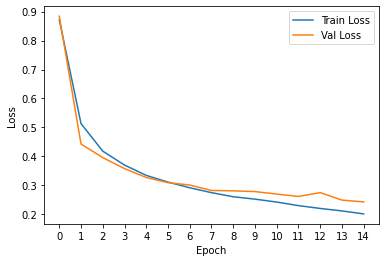

In [41]:
# TODO: plot 
# plot train vs validation loss

plt.plot(range(15), train_loss_list, label = "Train Loss")
plt.plot(range(15), val_loss_list, label = "Val Loss")
plt.xticks(range(0,15))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

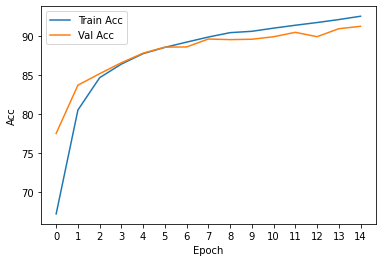

In [42]:
# plot train vs validation acc

plt.plot(range(15), train_acc_list, label = "Train Acc")
plt.plot(range(15), val_acc_list, label = "Val Acc")
plt.xticks(range(0,15))
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [43]:
# TODO: Report model performance on test set

# evaluate

test_dataset = CustomDataset(xtest_st, ytest)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

### test
test_acc_list= []
test_loss_list = []

# log test acc
test_accuracies = AverageMeter()
test_losses = AverageMeter() 

# save GT and pred labels
ypred = []
ytrue = []
    
model.eval()
with torch.no_grad():
        
    # Iterate through val dataset
    for images, labels in test_loader:
        # Load images with gradient accumulation capabilities
        images = torch.unsqueeze(images, 1)
        images = images.requires_grad_()
        
        # Forward pass only to get logits/output
        outputs = model(images)

        ### Calculate Loss and Acc: softmax --> cross entropy loss
        labels = labels.reshape(-1)
        loss = criterion(outputs, labels)
        acc1, _ = accuracy(outputs.data, labels, topk=(1, 2))

        # update avg meter for loss and acc
        test_losses.update(loss.data.item(), images.size(0))
        test_accuracies.update(acc1.item(), images.size(0))
        
        # save GT and pred labels
        outputs = (torch.max(torch.exp(outputs), 1)[1]).data.cpu().numpy()
        ypred.extend(outputs) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        ytrue.extend(labels) # Save Truth
        

test_acc_list.append(test_accuracies.avg)
test_loss_list.append(test_losses.avg)
        
# Print Avg Train Loss & Train Acc/epoch
print('Test_Loss: {:.3f}. Test_Accuracy: {:.3f}'.format(test_losses.avg, test_accuracies.avg))
print()

Test_Loss: 0.270. Test_Accuracy: 90.130



**What's your observation?**

**Answer:** By using drop out, the performance gap between the train and validation is much smaller now and very well aligned, meaning the overfitting has somewhat been resolved. Also, the validation performance is more stable and smoother.

### 4.3.2 Batch Normalization

This time, let's apply a batch normalization after every hidden layer, train the model for 15 epochs, plot the metric scores and loss values, and report model performance on test set as above. Compare this technique with the original model and with dropout, which technique do you think helps with overfitting better?

In [44]:
# TODO: build the model with batch normalization layers

# build model
import cv2
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchvision.models as models
import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import random_split

import math
import os
import argparse

class BatchNormNet(nn.Module):

    def __init__(self):
        super().__init__()

        self.conv_model = nn.Sequential(
                      #1
                      nn.Conv2d(1, 6, kernel_size=5, stride=1, padding= 2, bias=True),
                      nn.BatchNorm2d(6),
                      nn.ReLU(inplace=True),
                      nn.MaxPool2d(2, stride=2),
            
                      #2
                      nn.Conv2d(6, 16, kernel_size=5, stride= 1, padding =0, bias=True),
                      nn.BatchNorm2d(16),
                      nn.ReLU(inplace=True),
                      nn.MaxPool2d(2, stride=2),
                      
                      #3
                      nn.Conv2d(16, 120, kernel_size=5, stride= 1, padding =0, bias=True),
                      nn.BatchNorm2d(120),
                      nn.ReLU(inplace=True)

            )
        
        self.fc = nn.Sequential(
                      #4 FC
                      nn.Linear(120, 84, bias=True),
                      nn.ReLU(inplace=True),
            
                      # FC
                      nn.Linear(84, 10, bias=True),
                      
                      # removing softmax because CrossEntropyLoss already has softmax incorporated
                      # we do not want to apply softmax redundantly
            )
        

        
        
    def forward(self, x):

        #call the conv layers
        x = self.conv_model(x)
        x = x.reshape(x.size(0), -1)
        x = self.fc(x)
        
        return x

In [45]:
# TODO: train the model

model = BatchNormNet().double()

# hyper-parmas
num_epochs = 15
criterion = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train_acc_list= []
train_loss_list = []
val_acc_list= []
val_loss_list = []

for epoch in range(num_epochs):
    ### train
    
    # log train acc
    train_accuracies = AverageMeter()
    train_losses = AverageMeter()
    
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = torch.unsqueeze(images, 1)
        images = images.requires_grad_()

        # Forward pass to get output/logits
        outputs = model(images)

        ### Calculate Loss and Acc: softmax --> cross entropy loss
        labels = labels.reshape(-1)
        loss = criterion(outputs, labels)
        acc1, _ = accuracy(outputs.data, labels, topk=(1, 2))
    
        # update avg meter for loss and acc
        train_losses.update(loss.data.item(), images.size(0))
        train_accuracies.update(acc1.item(), images.size(0))
        

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()
        

    train_acc_list.append(train_accuracies.avg)
    train_loss_list.append(train_losses.avg)
        
    # Print Avg Train Loss & Train Acc/epoch
    print('Epoch: {}'.format(epoch))
    print('Train_Loss: {:.3f}. Train_Accuracy: {:.3f}'.format(train_losses.avg, train_accuracies.avg))

    
    ### val
    
    # log val acc
    val_accuracies = AverageMeter()
    val_losses = AverageMeter() 
    
    model.eval()
    with torch.no_grad():
        
        # Iterate through val dataset
        for images, labels in val_loader:
            # Load images with gradient accumulation capabilities
            images = torch.unsqueeze(images, 1)
            images = images.requires_grad_()

            # Forward pass only to get logits/output
            outputs = model(images)

            ### Calculate Loss and Acc: softmax --> cross entropy loss
            labels = labels.reshape(-1)
            loss = criterion(outputs, labels)
            acc1, _ = accuracy(outputs.data, labels, topk=(1, 2))

            # update avg meter for loss and acc
            val_losses.update(loss.data.item(), images.size(0))
            val_accuracies.update(acc1.item(), images.size(0))
        

    val_acc_list.append(val_accuracies.avg)
    val_loss_list.append(val_losses.avg)
        
    # Print Avg Train Loss & Train Acc/epoch
    print('Val_Loss: {:.3f}. Val_Accuracy: {:.3f}'.format(val_losses.avg, val_accuracies.avg))
    print()

Epoch: 0
Train_Loss: 0.473. Train_Accuracy: 84.165
Val_Loss: 0.328. Val_Accuracy: 87.842

Epoch: 1
Train_Loss: 0.310. Train_Accuracy: 88.658
Val_Loss: 0.300. Val_Accuracy: 88.775

Epoch: 2
Train_Loss: 0.265. Train_Accuracy: 90.140
Val_Loss: 0.283. Val_Accuracy: 89.200

Epoch: 3
Train_Loss: 0.244. Train_Accuracy: 90.906
Val_Loss: 0.277. Val_Accuracy: 89.925

Epoch: 4
Train_Loss: 0.226. Train_Accuracy: 91.621
Val_Loss: 0.263. Val_Accuracy: 90.233

Epoch: 5
Train_Loss: 0.206. Train_Accuracy: 92.142
Val_Loss: 0.260. Val_Accuracy: 90.775

Epoch: 6
Train_Loss: 0.194. Train_Accuracy: 92.704
Val_Loss: 0.291. Val_Accuracy: 89.500

Epoch: 7
Train_Loss: 0.186. Train_Accuracy: 92.931
Val_Loss: 0.282. Val_Accuracy: 90.283

Epoch: 8
Train_Loss: 0.172. Train_Accuracy: 93.569
Val_Loss: 0.263. Val_Accuracy: 91.233

Epoch: 9
Train_Loss: 0.157. Train_Accuracy: 94.069
Val_Loss: 0.281. Val_Accuracy: 90.925

Epoch: 10
Train_Loss: 0.148. Train_Accuracy: 94.458
Val_Loss: 0.272. Val_Accuracy: 90.792

Epoch: 11

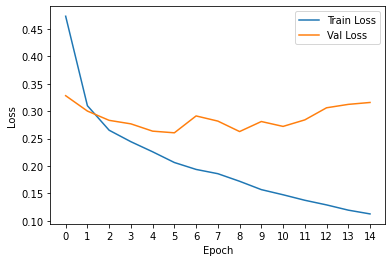

In [46]:
# TODO: plot
# plot train vs validation loss

plt.plot(range(15), train_loss_list, label = "Train Loss")
plt.plot(range(15), val_loss_list, label = "Val Loss")
plt.xticks(range(0,15))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

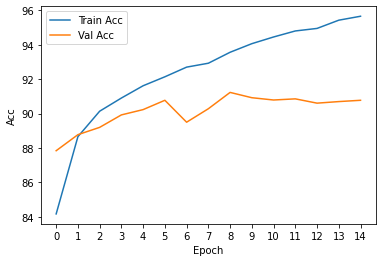

In [47]:
# plot train vs validation acc

plt.plot(range(15), train_acc_list, label = "Train Acc")
plt.plot(range(15), val_acc_list, label = "Val Acc")
plt.xticks(range(0,15))
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [48]:
# TODO: Report model performance on test set

# evaluate

test_dataset = CustomDataset(xtest_st, ytest)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

### test
test_acc_list= []
test_loss_list = []

# log test acc
test_accuracies = AverageMeter()
test_losses = AverageMeter() 

# save GT and pred labels
ypred = []
ytrue = []
    
model.eval()
with torch.no_grad():
        
    # Iterate through val dataset
    for images, labels in test_loader:
        # Load images with gradient accumulation capabilities
        images = torch.unsqueeze(images, 1)
        images = images.requires_grad_()
        
        # Forward pass only to get logits/output
        outputs = model(images)

        ### Calculate Loss and Acc: softmax --> cross entropy loss
        labels = labels.reshape(-1)
        loss = criterion(outputs, labels)
        acc1, _ = accuracy(outputs.data, labels, topk=(1, 2))

        # update avg meter for loss and acc
        test_losses.update(loss.data.item(), images.size(0))
        test_accuracies.update(acc1.item(), images.size(0))
        
        # save GT and pred labels
        outputs = (torch.max(torch.exp(outputs), 1)[1]).data.cpu().numpy()
        ypred.extend(outputs) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        ytrue.extend(labels) # Save Truth
        

test_acc_list.append(test_accuracies.avg)
test_loss_list.append(test_losses.avg)
        
# Print Avg Train Loss & Train Acc/epoch
print('Test_Loss: {:.3f}. Test_Accuracy: {:.3f}'.format(test_losses.avg, test_accuracies.avg))
print()

Test_Loss: 0.365. Test_Accuracy: 89.570



**Observation, comparison with Dropout:**

**Answer**:

Overall, I think that dropout helps with overfitting better than batch norm, because the train/val loss & accuracy graph from the drop out model are more closely aligned together than batch norm, meaning overfitting was resolved much better.